In [1]:
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install pandas
!pip install sklearn
!pip install pydotplus



from sklearn.impute import KNNImputer 
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
import sklearn as skl
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# import pydotplus

You should consider upgrading via the 'c:\users\dudit\pycharmprojects\scientificpython\venv\scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\dudit\pycharmprojects\scientificpython\venv\scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\dudit\pycharmprojects\scientificpython\venv\scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\dudit\pycharmprojects\scientificpython\venv\scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\dudit\pycharmprojects\scientificpython\venv\scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\dudit\pycharmprojects\scientificpython\venv\scripts\python.exe -m pip install --upgrade pip' command.


The Forest CoverType dataset

Relevant Information :

	Predicting forest cover type from cartographic variables only
	(no remotely sensed data).  The actual forest cover type for
	a given observation (30 x 30 meter cell) was determined from
	US Forest Service (USFS) Region 2 Resource Information System 
	(RIS) data.  Independent variables were derived from data
	originally obtained from US Geological Survey (USGS) and
	USFS data.  Data is in raw form (not scaled).

	This study area includes four wilderness areas located in the
	Roosevelt National Forest of northern Colorado.  These areas
	represent forests with minimal human-caused disturbances,
	so that existing forest cover types are more a result of 
	ecological processes rather than forest management practices.




Name                                     Data Type    Measurement                       Description

Elevation                               quantitative    meters                       Elevation in meters
Aspect                                  quantitative    azimuth                      Aspect in degrees azimuth
Slope                                   quantitative    degrees                      Slope in degrees
Horizontal_Distance_To_Hydrology        quantitative    meters                       Horz Dist to nearest surface water features
Vertical_Distance_To_Hydrology          quantitative    meters                       Vert Dist to nearest surface water features
Horizontal_Distance_To_Roadways         quantitative    meters                       Horz Dist to nearest roadway
Hillshade_9am                           quantitative    0 to 255 index               Hillshade index at 9am, summer solstice
Hillshade_Noon                          quantitative    0 to 255 index               Hillshade index at noon, summer soltice
Hillshade_3pm                           quantitative    0 to 255 index               Hillshade index at 3pm, summer solstice
Horizontal_Distance_To_Fire_Points      quantitative    meters                       Horz Dist to nearest wildfire ignition points
Wilderness_Area 					    qualitative     type						 Wilderness area designation
Cover_Type (7 types)                    integer         1 to 7                       Forest Cover Type designation

Code Designations:

Wilderness Areas:  	1 -- Rawah Wilderness Area
                    2 -- Neota Wilderness Area
                    3 -- Comanche Peak Wilderness Area
                    4 -- Cache la Poudre Wilderness Area

Forest Cover Type Classes:	1 -- Spruce/Fir        ----------> אשוח
                            2 -- Lodgepole Pine    ----------> אורן
                            3 -- Ponderosa Pine    ----------> אורן
                            4 -- Cottonwood/Willow ----------> כותנה
                            5 -- Aspen             ----------> צַפצָפָה
                            6 -- Douglas-fir       ----------> אשוח
                            7 -- Krummholz         ----------> קרומהולץ

In [2]:
df = pd.read_csv('forestCover3.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 12 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           569261 non-null  float64
 1   Aspect                              581012 non-null  int64  
 2   Slope                               476254 non-null  object 
 3   Horizontal_Distance_To_Hydrology    569300 non-null  float64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64  
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64  
 6   Hillshade_9am                       569152 non-null  float64
 7   Hillshade_Noon                      552360 non-null  float64
 8   Hillshade_3pm                       581012 non-null  int64  
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64  
 10  Area_Type                           528560 non-null  object 
 11  Cover_Type                

##### number of nan in each column

In [4]:
df.isnull().sum()

Elevation                              11751
Aspect                                     0
Slope                                 104758
Horizontal_Distance_To_Hydrology       11712
Vertical_Distance_To_Hydrology             0
Horizontal_Distance_To_Roadways            0
Hillshade_9am                          11860
Hillshade_Noon                         28652
Hillshade_3pm                              0
Horizontal_Distance_To_Fire_Points         0
Area_Type                              52452
Cover_Type                                 0
dtype: int64

##### sum of nan values in each row

In [5]:
df.isnull().sum(axis=1).value_counts()

0    387399
1    167684
2     24326
3      1563
4        40
dtype: int64

##### drop all rows with 2 or more nan values

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum(axis=1).value_counts()

0    387399
dtype: int64

In [8]:
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Area_Type                             0
Cover_Type                            0
dtype: int64

In [9]:
df.describe(include='all')

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Area_Type,Cover_Type
count,387399.000000,387399.000000,387399,387399.000000,387399.000000,387399.000000,387399.000000,387399.000000,387399.000000,387399.000000,387399,387399.000000
unique,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,Medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wilderness_Area_1,NaN
freq,NaN,NaN,152895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174229,NaN
mean,3279.422169,155.761401,NaN,269.483584,46.384547,2350.328336,212.175049,223.327603,142.499279,1981.442639,NaN,2.048833
std,302.637741,111.869635,NaN,212.715548,58.271583,1559.926493,26.758247,19.779307,38.295643,1325.092450,NaN,1.392692
min,1724.000000,0.000000,NaN,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000
25%,3110.000000,59.000000,NaN,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,NaN,1.000000
50%,3315.000000,127.000000,NaN,218.000000,29.000000,1998.000000,218.000000,226.000000,143.000000,1710.000000,NaN,2.000000
75%,3491.000000,260.000000,NaN,384.000000,69.000000,3330.000000,231.000000,237.000000,168.000000,2551.000000,NaN,2.000000


In [10]:
print(df['Area_Type'].value_counts())

Wilderness_Area_1    174229
Wilderness_Area_3    168538
Wilderness_Area_4     24656
Wilderness_Area_2     19976
Name: Area_Type, dtype: int64


In [11]:
print(df['Slope'].value_counts())

Medium    152895
Slight    138824
Major      95680
Name: Slope, dtype: int64


##### convert categorical to numerical 

In [12]:
df['Slope'] = pd.Categorical(df['Slope'],ordered=True,categories=['Slight', 'Medium', 'Major']).codes
df['Area_Type'] = pd.Categorical(df['Area_Type'],ordered=True,categories=
                    ['Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3','Wilderness_Area_4']).codes

In [13]:
# df['Slope'].value_counts()

In [14]:
# df['Area_Type'].value_counts()

In [15]:
# def na_randomfill_slop(series , values_num):
    
#     na_mask = pd.isnull(series)   # boolean mask for null values // 
#     n_null = na_mask.sum()        # number of nulls in the Series // 
    
#     most_common_values = pd.Series(series.value_counts()[:values_num].index.to_list())
    
#     print(most_common_values)
    
#     if n_null == 0:
#         return series             # if there are no nulls, no need to resample
    
#     # Randomly sample the non-null values from our series
#     #  only sample this Series as many times as we have nulls 
#     fill_values = most_common_values.sample(n=n_null, replace=True, random_state=0)

#     # This ensures our new values will replace NaNs in the correct locations
#     fill_values.index = series.index[na_mask]
    
#     return series.fillna(fill_values) 

In [16]:
# df['Slope'] = na_randomfill(df['Slope'] , 3)

In [17]:
# df['Area_Type'] = na_randomfill(df['Area_Type'] , 2)

In [18]:
# df['Slope'].value_counts()

In [19]:
# df['Area_Type'].value_counts()

In [20]:
# df.isnull().sum()

In [21]:
# df['Slope'] = pd.Categorical(df['Slope'],ordered=True,categories=['Slight', 'Medium', 'Major']).codes
# df['Area_Type'] = pd.Categorical(df['Area_Type'],ordered=True,categories=
#                     ['Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3','Wilderness_Area_4']).codes

In [22]:
# df[['Elevation', 'Horizontal_Distance_To_Hydrology' , 'Hillshade_9am' , 'Hillshade_Noon']].describe(include="all")

In [23]:
# df['Elevation'].fillna(df['Elevation'].mean() , inplace=True)
# df['Hillshade_9am'].fillna(df['Hillshade_9am'].mean() , inplace=True)
# df['Hillshade_Noon'].fillna(df['Hillshade_Noon'].mean() , inplace=True)

In [24]:
# df['Horizontal_Distance_To_Hydrology'].fillna(df['Horizontal_Distance_To_Hydrology'].mean() , inplace=True)


In [25]:
# df.isnull().sum()

In [26]:
# df = df.drop_duplicates()

In [27]:
# save data to new csv

# Task 2

In [28]:
# some dictionaries in order to plot easier
coverType_dict = {
             1 : 'Spruce/Fir' ,
             2 : 'Lodgepole Pine',
             3 : 'Ponderosa Pine',
             4 : 'Cottonwood/Willow',
             5 : 'Aspen',
             6 : 'Douglas-fir',
             7 : 'Krummholz'
        }
areaType_dict = {
            0 : 'Rawah Wilderness Area' ,
            1 : 'Neota Wilderness Area' ,
            2 : 'Comanche Peak Wilderness Area',
            3 : 'Cache la Poudre Wilderness Area',
        }
slope_dict = {
            0 : 'Slight' ,
            1 : 'Medium' ,
            2 : 'Major'
        }


###### cover type amount

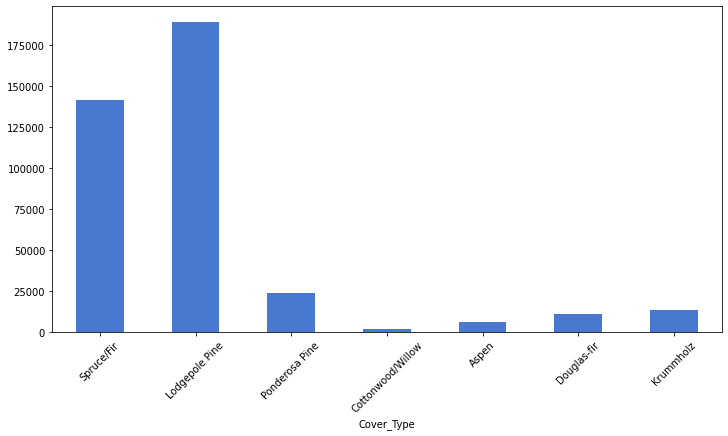

In [29]:
from matplotlib.colors import ListedColormap

my_cmap = ListedColormap(sns.color_palette('muted').as_hex())
df_gb = df.groupby('Cover_Type').size()
plt.figure(figsize=(12,6))
df_gb.plot(kind = 'bar' , cmap = my_cmap )

plt.xticks(list(coverType_dict.keys()), list(coverType_dict.values()))
plt.xticks(rotation=45)
plt.show()

##### violin plots (only numerical features)

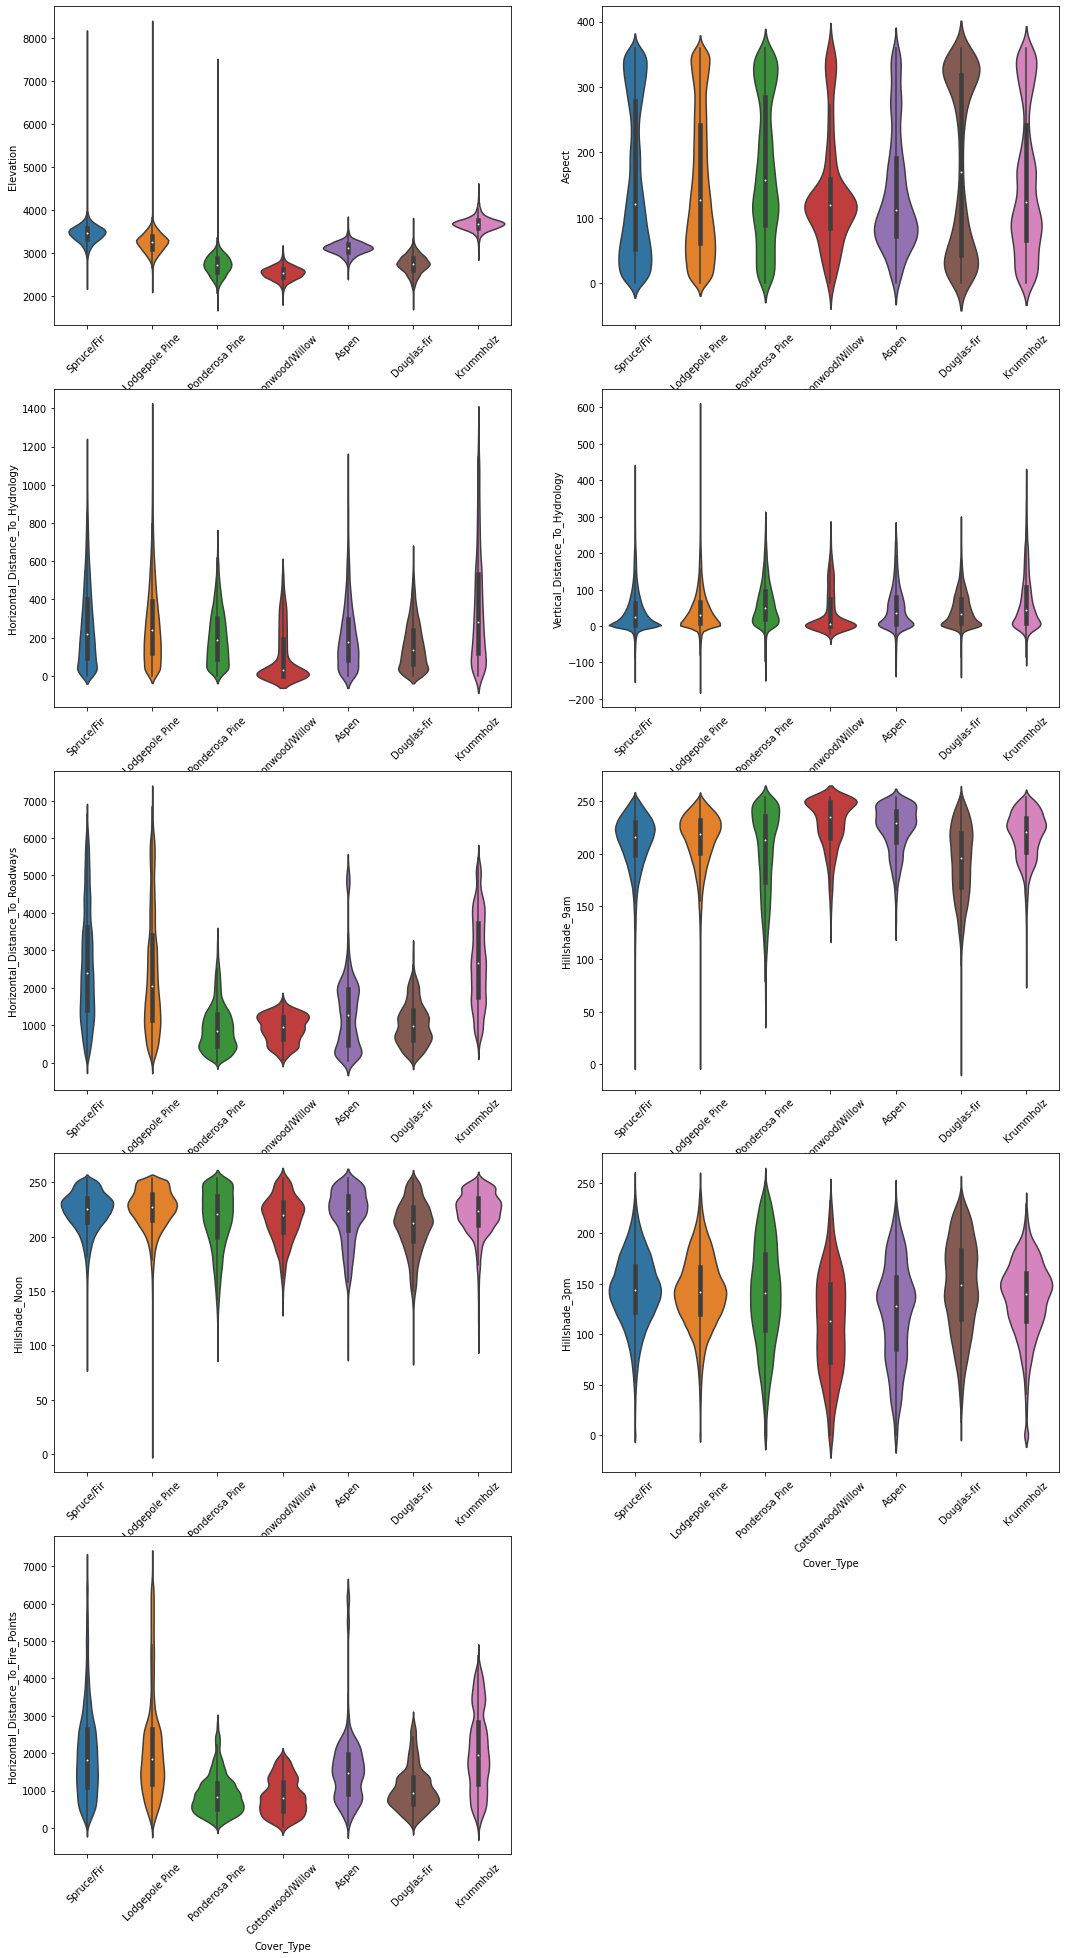

In [30]:
all_features=df.drop(['Slope' ,'Area_Type' ], axis=1)
fig = plt.figure()
fig.set_figheight(34)
fig.set_figwidth(18)

for i, feature in enumerate(all_features.columns.to_list()):
    if(feature != 'Cover_Type'):
        fig.add_subplot(math.ceil(len(all_features.columns.to_list())/2), 2, i+1)
        VP = sns.violinplot(y= feature, x = 'Cover_Type', data = all_features)
        VP.set(xticklabels=list(coverType_dict.values()))
        plt.xticks(rotation=45)

##### bar plot (categorical features)

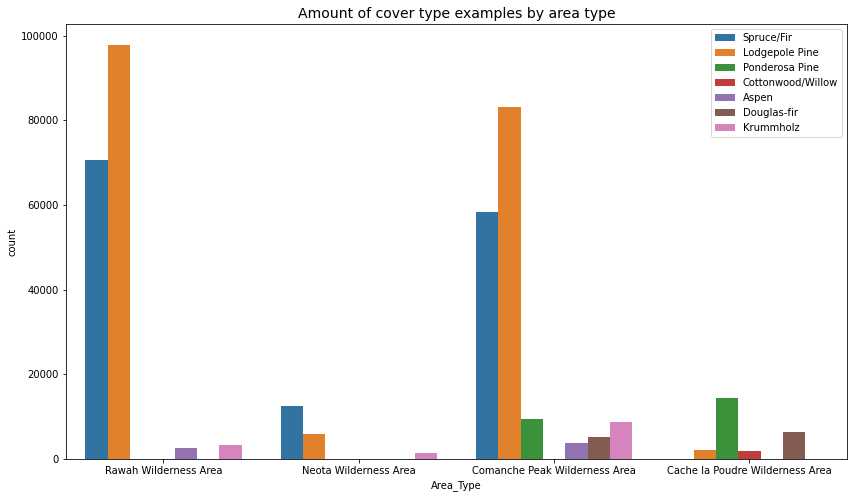

In [31]:
plt.figure(figsize =(14,8))
sns.countplot(data=df, x='Area_Type', hue='Cover_Type')
plt.xticks(list(areaType_dict.keys()), list(areaType_dict.values()))
plt.title("Amount of cover type examples by area type", size=14)
plt.legend(list(coverType_dict.values()) ,loc = 'upper right')
plt.show()

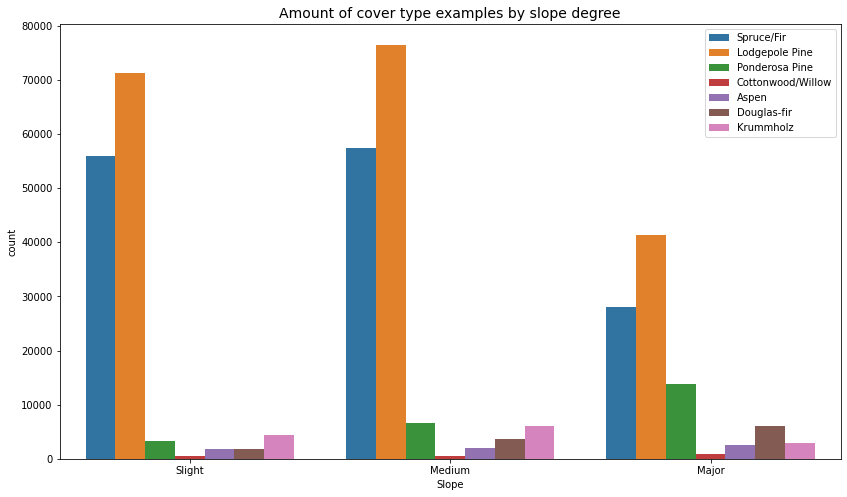

In [32]:
plt.figure(figsize =(14,8))
sns.countplot(data=df, x='Slope', hue='Cover_Type')
plt.xticks(list(slope_dict.keys()), list(slope_dict.values()))
plt.title("Amount of cover type examples by slope degree", size=14)
plt.legend(list(coverType_dict.values()) ,loc = 'upper right')
plt.show()

##### kde plots (categorical features)

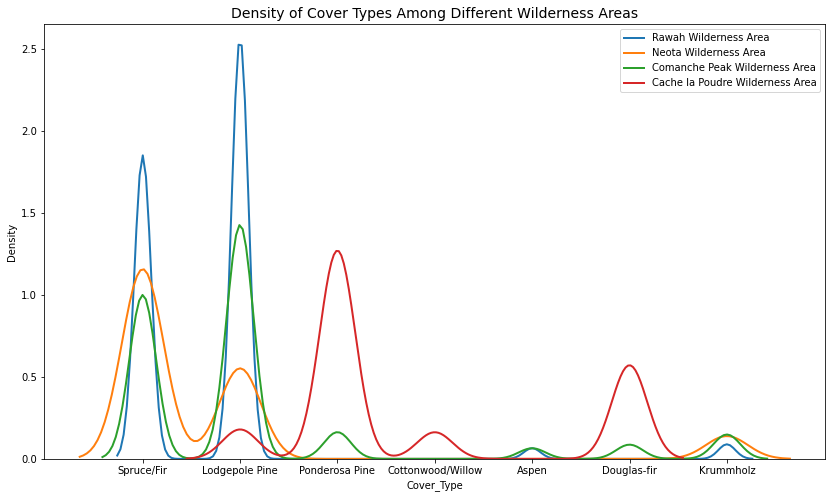

In [33]:
#list of wilderness areas
wilderness_areas = sorted(df['Area_Type'].value_counts().index.tolist())
plt.figure(figsize =(14,8))

# plot cover_type distribution for each wilderness area
for area in wilderness_areas:
    subset = df[df['Area_Type'] == area]
    sns.kdeplot(subset["Cover_Type"] , label = areaType_dict[area] , linewidth=2)

# set title, legends and labels
plt.ylabel("Density")
plt.xlabel("Cover_Type")
plt.xticks(list(coverType_dict.keys()), list(coverType_dict.values()))
plt.title("Density of Cover Types Among Different Wilderness Areas", size=14)
plt.legend()
plt.show()

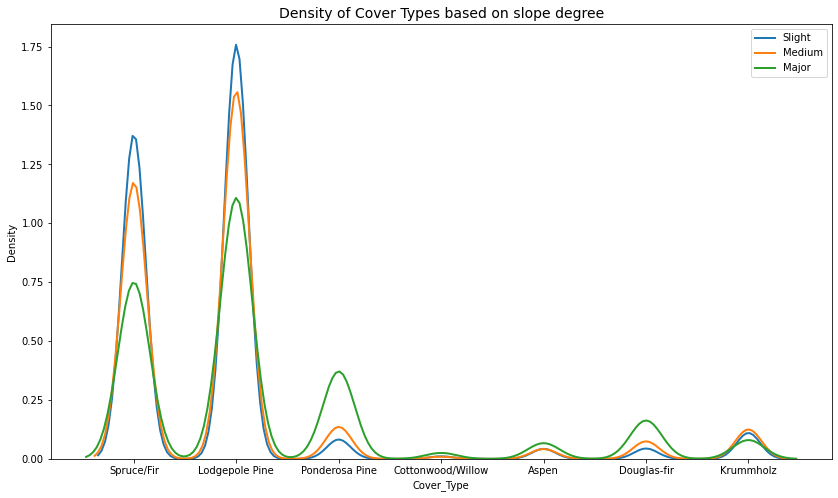

In [34]:
#list of wilderness areas
Slopes = sorted(df['Slope'].value_counts().index.tolist())
plt.figure(figsize =(14,8))

# plot cover_type distribution for each wilderness area
for slope in Slopes:
    subset = df[df['Slope'] == slope]
    sns.kdeplot(subset["Cover_Type"] ,label = slope_dict[slope], linewidth=2)

# set title, legends and labels
plt.ylabel("Density")
plt.xlabel("Cover_Type")
plt.xticks(list(coverType_dict.keys()), list(coverType_dict.values()))
plt.title("Density of Cover Types based on slope degree", size=14)
plt.legend()
plt.show()

<AxesSubplot:>

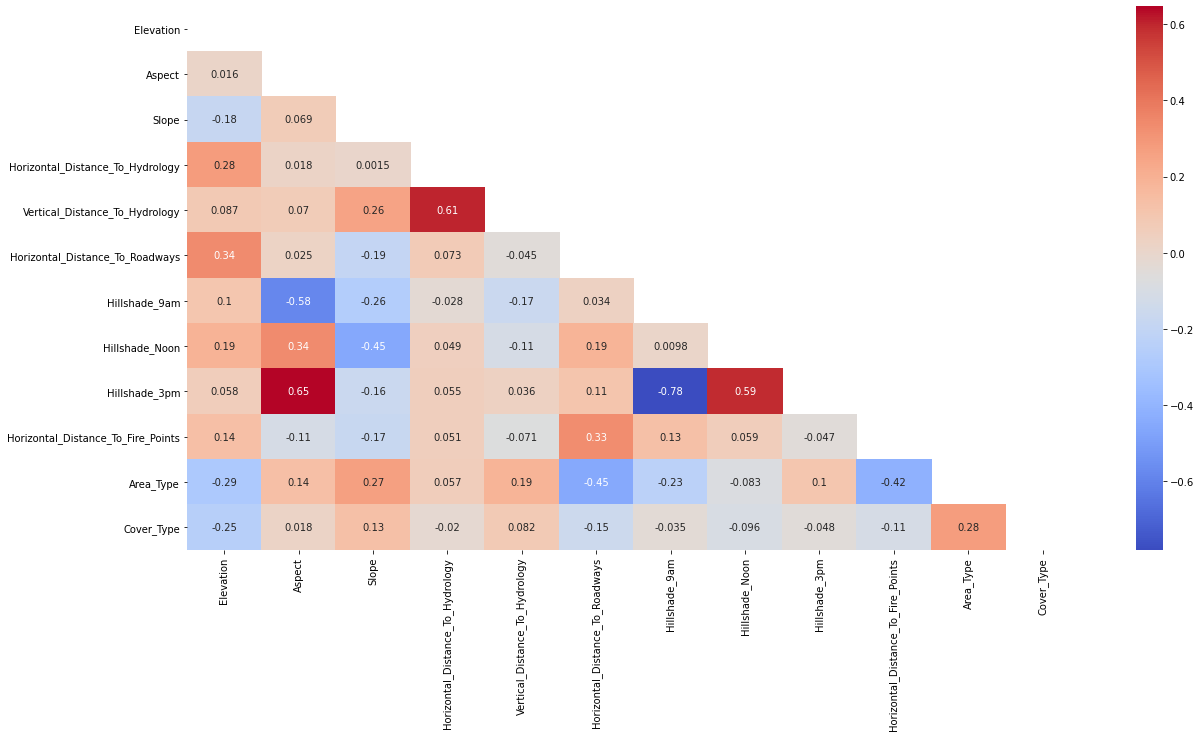

In [35]:
fig = plt.figure(figsize=(20,10))
corr = df.corr()
matrix = np.triu(corr.corr())
sns.heatmap(corr, annot= True,  mask=matrix, cmap='coolwarm')

##### high correlation features pairplot

Hillshade_9am and Hillshade_3pm = -0.78
Aspect and Hillshade_3pm = 0.65
Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology = 0.61
Hillshade_Noon and Hillshade_3pm = 0.59
Aspect and Hillshade_9am = -0.58


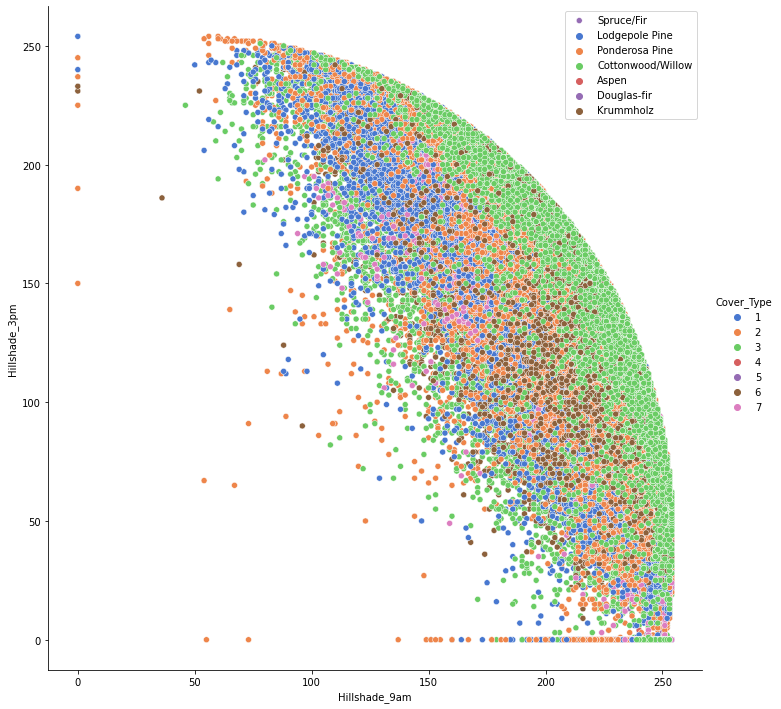

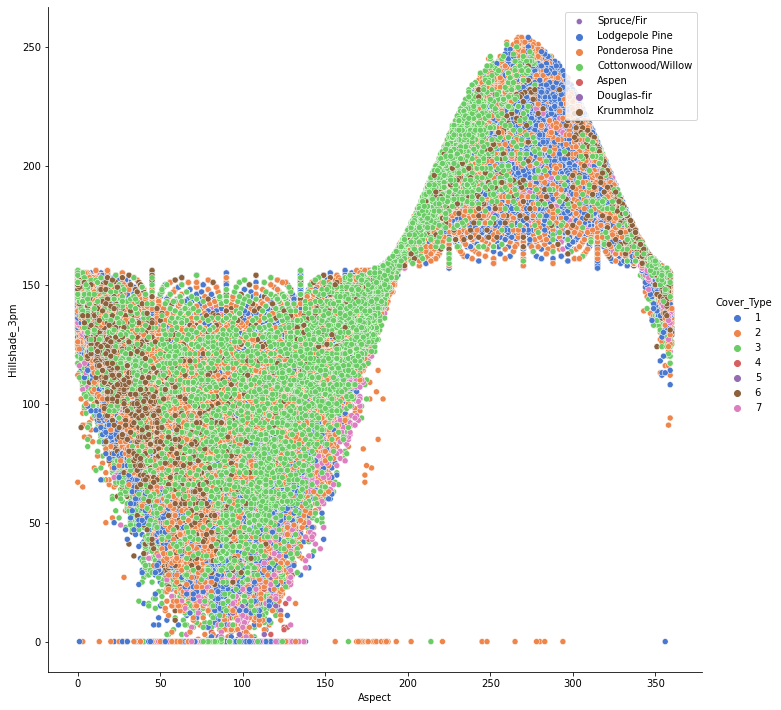

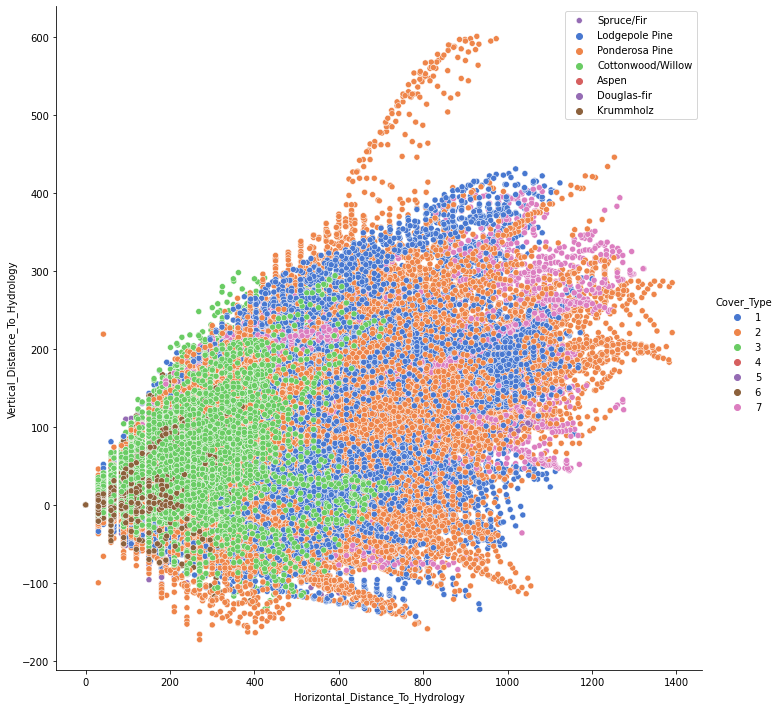

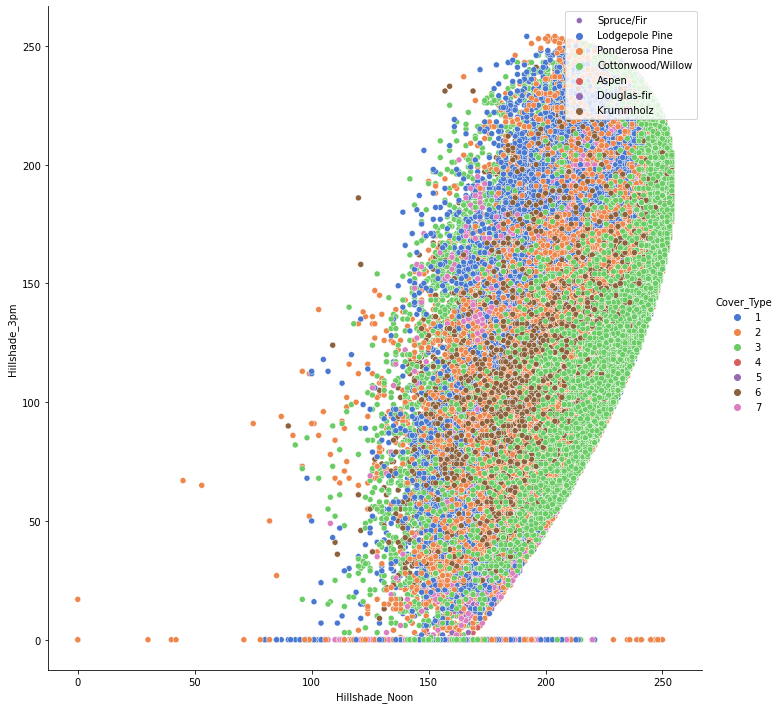

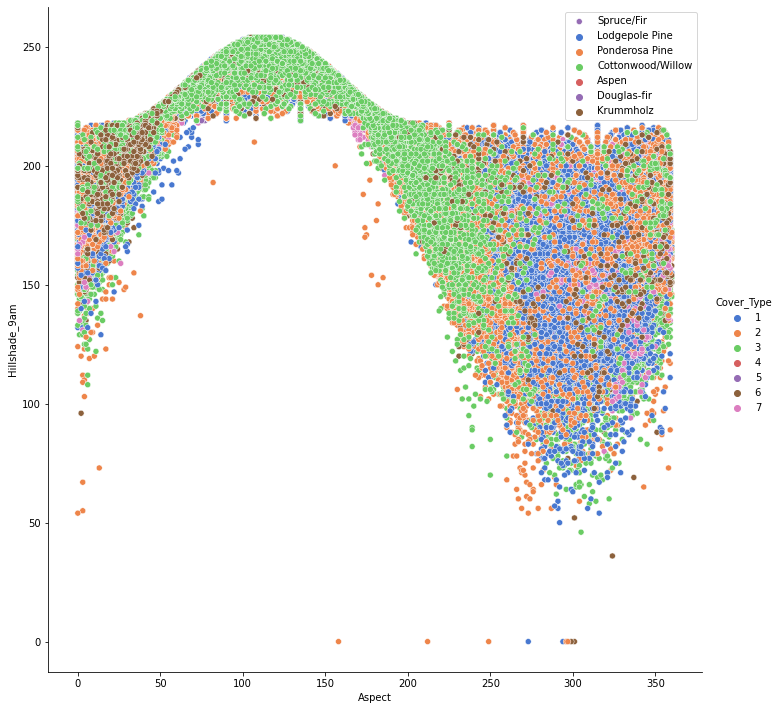

In [36]:
#create a dataframe with only 'size' features

#get the names of all the columns
cols=df.columns 

# Calculates pearson co-efficient for all combinations
data_corr = df.corr()

# Set the threshold to select only only highly correlated attributes
threshold = 0.5

# List of pairs along with correlation above threshold
corr_list = []

#Search for the highly correlated pairs
for i in range(0,len(df.columns)): #for 'size' features
    for j in range(i+1,len(df.columns)): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

    
for v,i,j in s_corr_list:
    sns.pairplot(df, hue="Cover_Type", height=10, x_vars=cols[i],y_vars=cols[j] , palette='muted')
    plt.legend(list(coverType_dict.values()) ,loc = 'upper right')
    plt.show()

In [37]:
df = df.drop(df[df.Hillshade_9am == 0].index)
df = df.drop(df[df.Hillshade_Noon == 0].index)
df = df.drop(df[df.Hillshade_3pm == 0].index)

# Task 4

In [38]:
def split(df):
    df = df.copy()
    
    # split df into x and y
    y = df['Cover_Type'].copy()
    x = df.drop('Cover_Type' , axis=1).copy()

    # train test split
    x_train , x_test , y_train , y_test = train_test_split( x , y , train_size=0.8 , random_state=123)
    
    
    return x_train , x_test , y_train , y_test

In [39]:
def evaluate_model(model , method , x_test , y_test):
    
    modelAcc = model.score(x_test , y_test)
    print("Accuracy ({}): {:.2f}%".format(method , modelAcc * 100))
    
    y_pred = model.predict(x_test)
    
    cm = metrics.confusion_matrix(y_test , y_pred)
    clr = metrics.classification_report(y_test , y_pred , zero_division=0)
    
    li = list(coverType_dict.keys())
    [x+0.5 for x in li]
    plt.figure(figsize =(12,12))
    sns.heatmap(cm , annot=True , fmt='g' , vmin=1 , cbar=False, cmap='coolwarm')
    plt.xlabel('Predicted')
    plt.ylabel('Correct')
    plt.yticks(np.arange(7)+0.5,list(coverType_dict.values()), rotation=0, va="center")
    plt.xticks(np.arange(7)+0.5,list(coverType_dict.values()), rotation=0, va="center")
    plt.title('Confuion Matrix')
    plt.show()
    
    print("Classification Report: \n" , clr)
    
    

In [40]:
tmpData = df.copy()
x_train , x_test , y_train , y_test = split(tmpData)

Accuracy (GaussianNB_model): 59.55%


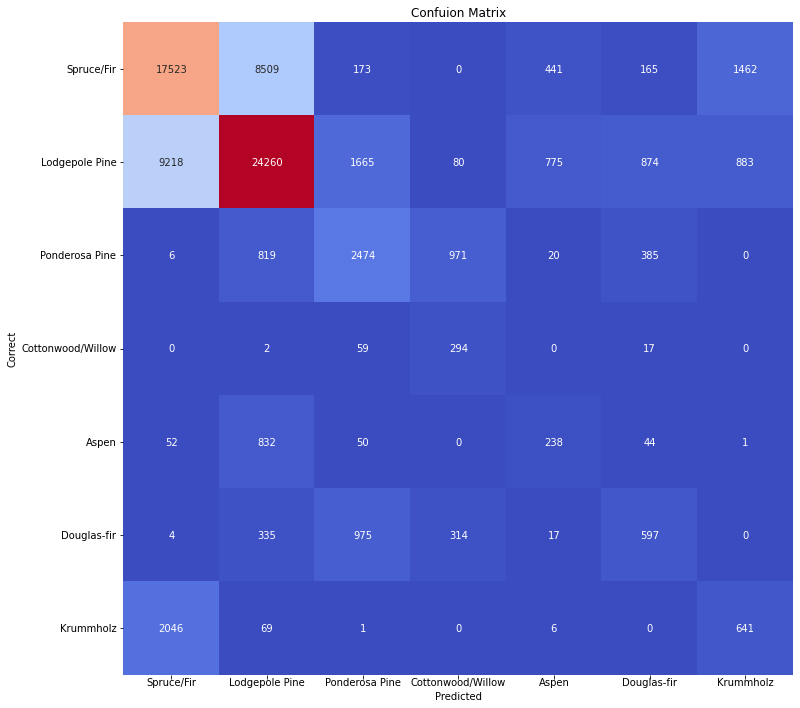

Classification Report: 
               precision    recall  f1-score   support

           1       0.61      0.62      0.61     28273
           2       0.70      0.64      0.67     37755
           3       0.46      0.53      0.49      4675
           4       0.18      0.79      0.29       372
           5       0.16      0.20      0.18      1217
           6       0.29      0.27      0.28      2242
           7       0.21      0.23      0.22      2763

    accuracy                           0.60     77297
   macro avg       0.37      0.47      0.39     77297
weighted avg       0.61      0.60      0.60     77297



In [41]:
GaussianNB_model = GaussianNB()
GaussianNB_model.fit(x_train , y_train)
evaluate_model(GaussianNB_model , "GaussianNB_model", x_test , y_test)

<AxesSubplot:>

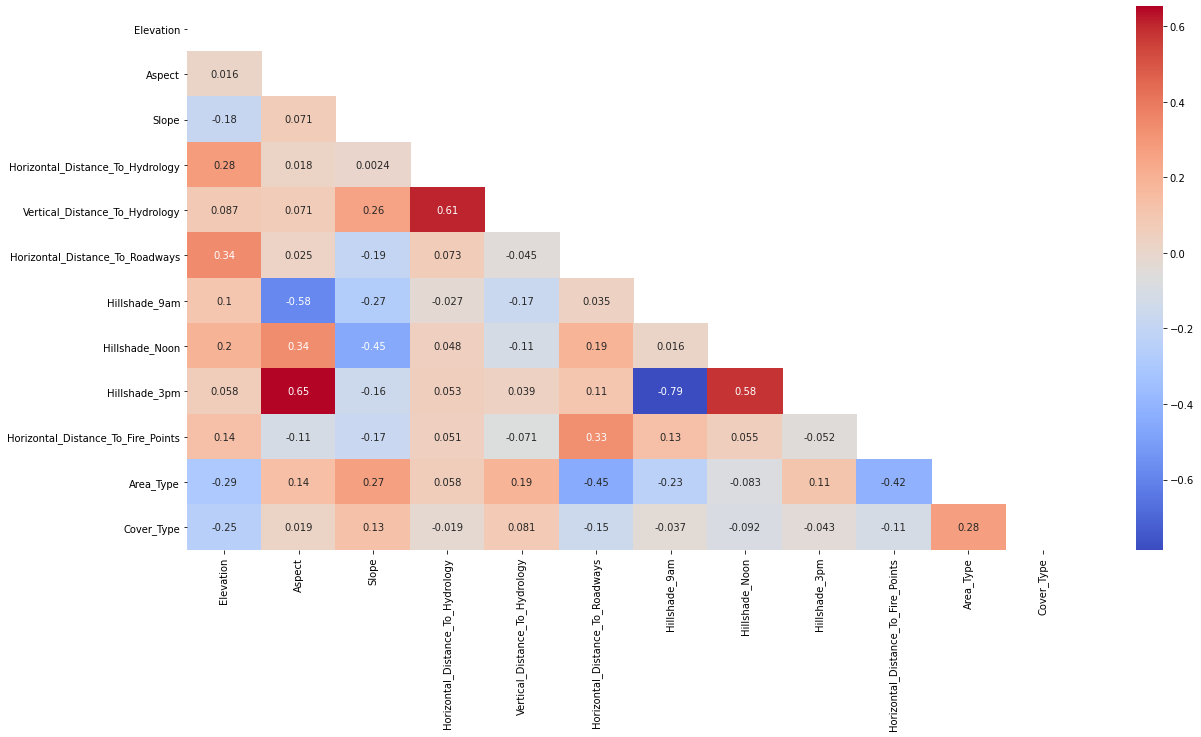

In [42]:
fig = plt.figure(figsize=(20,10))

corr = df.corr()
matrix = np.triu(corr.corr())
sns.heatmap(corr, annot= True,  mask=matrix, cmap='coolwarm')

In [43]:
tmpData2 = df.copy()
tmpData2 = df[['Horizontal_Distance_To_Roadways','Elevation' , 'Cover_Type' ]]
x_train , x_test , y_train , y_test = split(tmpData2)

Accuracy (GaussianNB_model): 62.46%


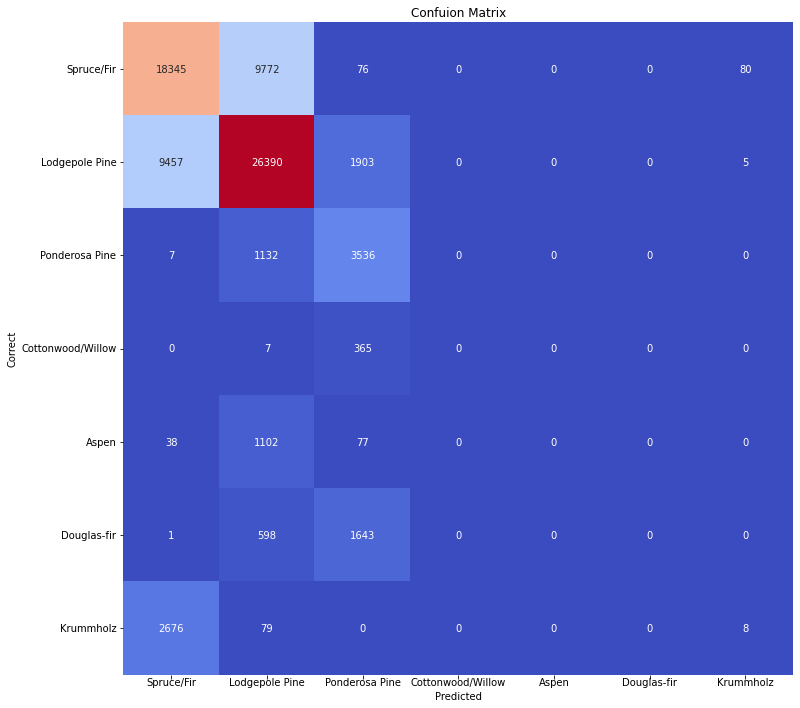

Classification Report: 
               precision    recall  f1-score   support

           1       0.60      0.65      0.62     28273
           2       0.68      0.70      0.69     37755
           3       0.47      0.76      0.58      4675
           4       0.00      0.00      0.00       372
           5       0.00      0.00      0.00      1217
           6       0.00      0.00      0.00      2242
           7       0.09      0.00      0.01      2763

    accuracy                           0.62     77297
   macro avg       0.26      0.30      0.27     77297
weighted avg       0.58      0.62      0.60     77297



In [44]:
GaussianNB_model.fit(x_train , y_train)
evaluate_model(GaussianNB_model , "GaussianNB_model", x_test , y_test)

Accuracy (DecisionTreeClassifier_model): 78.56%


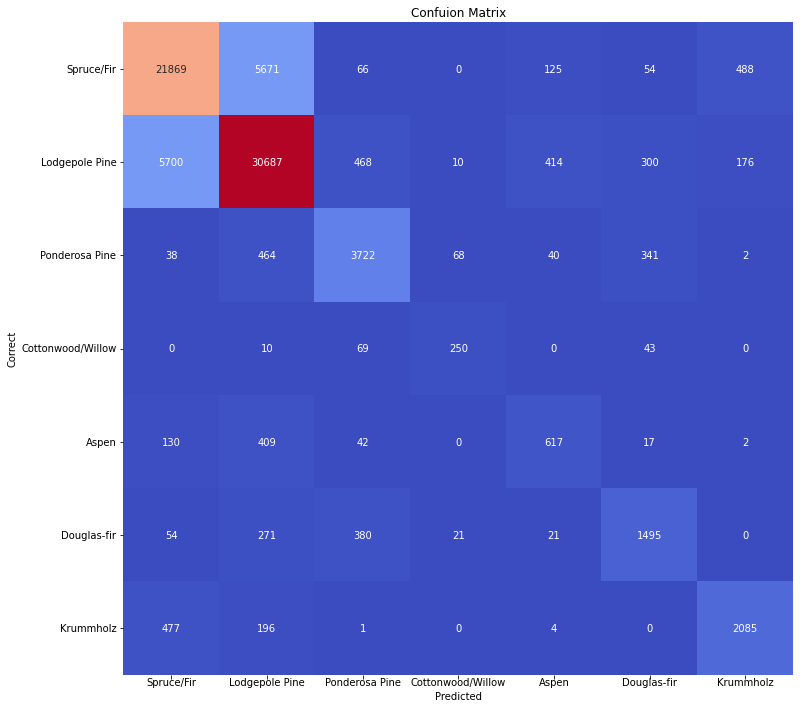

Classification Report: 
               precision    recall  f1-score   support

           1       0.77      0.77      0.77     28273
           2       0.81      0.81      0.81     37755
           3       0.78      0.80      0.79      4675
           4       0.72      0.67      0.69       372
           5       0.51      0.51      0.51      1217
           6       0.66      0.67      0.67      2242
           7       0.76      0.75      0.76      2763

    accuracy                           0.79     77297
   macro avg       0.72      0.71      0.71     77297
weighted avg       0.79      0.79      0.79     77297



In [45]:
# without manipulating the data.
x_train , x_test , y_train , y_test = split(tmpData)
DecisionTreeClassifier_model = DecisionTreeClassifier()
DecisionTreeClassifier_model.fit(x_train , y_train)
evaluate_model(DecisionTreeClassifier_model , "DecisionTreeClassifier_model", x_test , y_test)

Accuracy (DecisionTreeClassifier_model): 79.00%


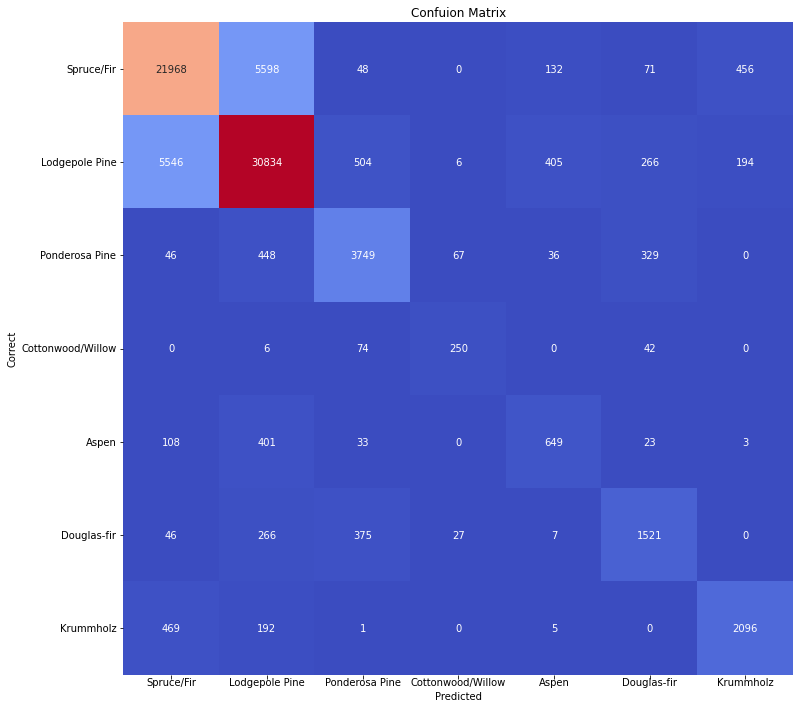

Classification Report: 
               precision    recall  f1-score   support

           1       0.78      0.78      0.78     28273
           2       0.82      0.82      0.82     37755
           3       0.78      0.80      0.79      4675
           4       0.71      0.67      0.69       372
           5       0.53      0.53      0.53      1217
           6       0.68      0.68      0.68      2242
           7       0.76      0.76      0.76      2763

    accuracy                           0.79     77297
   macro avg       0.72      0.72      0.72     77297
weighted avg       0.79      0.79      0.79     77297



In [46]:
# with manipulating the data. 
tmpData3 = df.copy()
tmpData3 = df.drop(['Aspect' , 'Hillshade_3pm'] , axis = 1) 
low = .02
high = .98
quant_df = tmpData3.quantile([low, high])
filt_df = tmpData3.apply(lambda x: x[(x>quant_df.loc[low,x.name]) & 
                                    (x < quant_df.loc[high,x.name])], axis=0)
filt_df.dropna(inplace=True)

x_train , x_test , y_train , y_test = split(tmpData3)

DecisionTreeClassifier_model = DecisionTreeClassifier()
DecisionTreeClassifier_model.fit(x_train , y_train)
evaluate_model(DecisionTreeClassifier_model , "DecisionTreeClassifier_model", x_test , y_test)

Feature: Elevation, Score: 0.37692
Feature: Slope, Score: 0.03250
Feature: Horizontal_Distance_To_Hydrology, Score: 0.21575
Feature: Vertical_Distance_To_Hydrology, Score: 0.17604
Feature: Horizontal_Distance_To_Roadways, Score: 0.36071
Feature: Hillshade_9am, Score: 0.18611
Feature: Hillshade_Noon, Score: 0.19670
Feature: Horizontal_Distance_To_Fire_Points, Score: 0.33784
Feature: Area_Type, Score: 0.25712
9 []


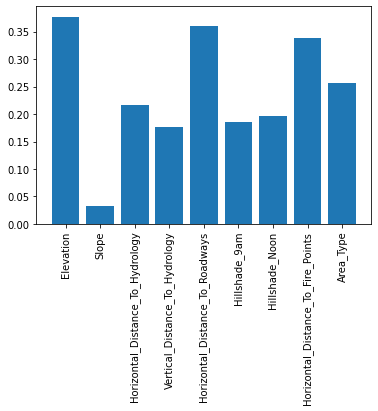

In [47]:
from sklearn.inspection import permutation_importance

y = tmpData3['Cover_Type'].copy()
x = tmpData3.drop('Cover_Type' , axis=1).copy()

result = permutation_importance(DecisionTreeClassifier_model, x, y, n_repeats=10,random_state=0)
importance = zip(x.columns,result['importances_mean'])
# summarize feature importance
for i,v in importance:
    print('Feature: %s, Score: %.5f' % (i,v))
# plot feature importance
print(len(x.columns),[x[1] for x in importance])
plt.bar(range(len(x.columns)), result['importances_mean'])
plt.xticks(ticks=range(len(x.columns)),labels=x.columns, rotation=90)
plt.show()

## summary

features:
To sum everything, I discovered some interesting facts after analyzing the dataset, 
First of all, the most influencing feature was of course the 'Elevation' and also 'Horizontal_Distance_To_Roadways' and 'Horizontal_Distance_To_Fire_Points' - which all related to height, it might indicate that 
some of the trees grow better in different elevations.

algorithm:
I also know for sure that the better algorithm to classify this dataset is DecisionTreeClassifier, it has a massive advantage on every aspect. and although I needed to classify 7 different cover types, the algorithm shows tremendous power - about 80% of correctness. 
And in the other hand, we have the NBClassifier which scored an average (but still much better than 1 to 7) result with 60% without manipulating the data and about 62% after. Also, after I chose the two best features we got an overall score of 62% but and this is very important we miss all of the cover types 4-6 which was disappointing.

It wasn't easy for me to manipulate the data' I spent lots of hours on that, and in the end, I decided to remove all nan values. 
especially because of the amount of data that I received.

